In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [4]:
data = pd.DataFrame({
    'Square Feet': [1500, 1800, 2400, 3000, 3500],
    'Bedrooms': [3, 4, 3, 5, 4],
    'Price': [400000, 500000, 600000, 650000, 700000]
})

In [5]:
print(data)

   Square Feet  Bedrooms   Price
0         1500         3  400000
1         1800         4  500000
2         2400         3  600000
3         3000         5  650000
4         3500         4  700000


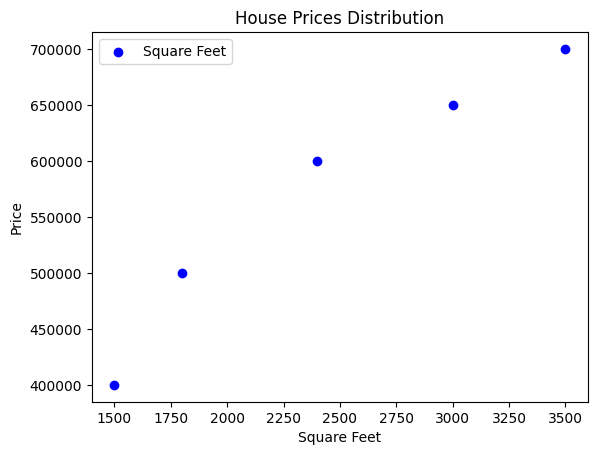

In [7]:
plt.scatter(data['Square Feet'], data['Price'], color='blue',
label='Square Feet')
plt.title('House Prices Distribution')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.legend()
plt.show()

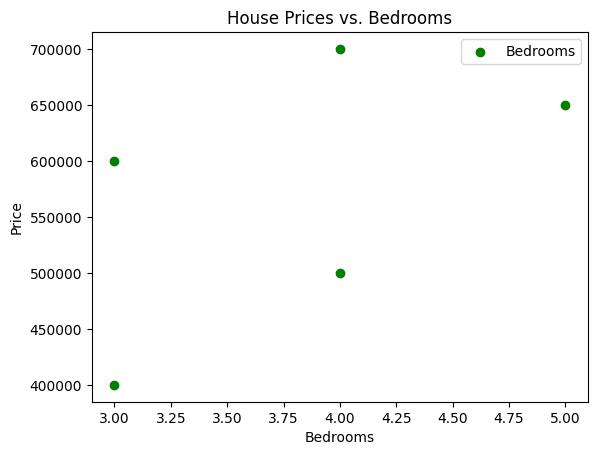

In [9]:
plt.scatter(data['Bedrooms'], data['Price'], color='green',
label='Bedrooms')
plt.title('House Prices vs. Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
X = data[['Square Feet', 'Bedrooms']] # Features
y = data['Price'] # Target
X_train, X_test, Y_train, Y_test = train_test_split(X,y,
test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1638172120.3824396


In [13]:
print(X_test)
print(Y_test)
print(y_pred)

   Square Feet  Bedrooms
1         1800         4
1    500000
Name: Price, dtype: int64
[459525.66096423]


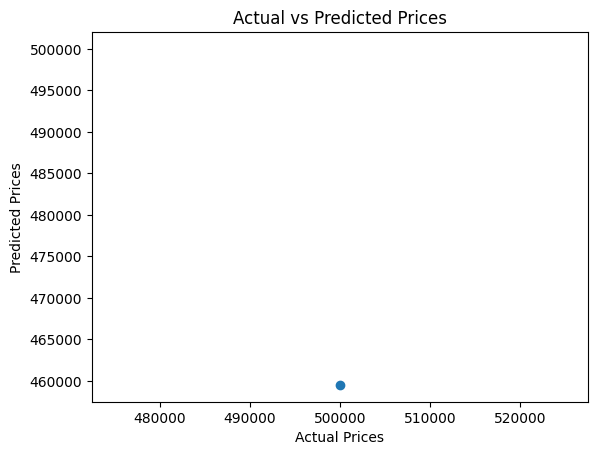

In [15]:
plt.scatter(Y_test, y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],
'k--', lw=4)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [16]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [17]:
housing =  fetch_california_housing()
X = pd.DataFrame(housing.data, columns = housing.feature_names)
y = housing.target
print(X.head()) # Shows the features in the dataset
print(y[:5])    # Shows the first 5 target values

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
[4.526 3.585 3.521 3.413 3.422]


In [18]:
# Checking for missing values
print(X.isnull().sum())
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y,
test_size=0.2, random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error:",  mse)

Mean Squared Error: 0.555891598695244


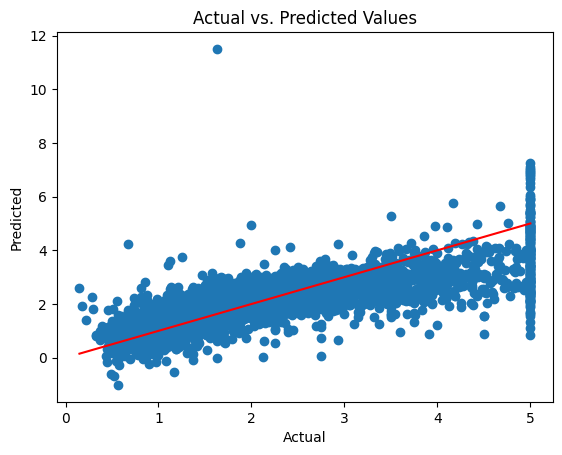

In [31]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)],
color='red') # Line showing the perfect predictions
plt.show()